# Анализ станций

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_table(f'data/src/{2013}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')

,id,biketype,starttime,endtime,startstation,endstation,startlat,startlng,endlat,endlng,member_casual,gender,age,bikeid
0,126212,NaN,2013-07-29T19:03:00,2013-07-29T19:21:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,847
1,153535,NaN,2013-08-04T00:22:00,2013-08-04T00:46:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,513
2,74162,NaN,2013-07-17T23:45:00,2013-07-18T00:09:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,25.0,505
3,572092,NaN,2013-09-23T19:58:00,2013-09-23T20:24:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,38.0,2407
4,71712,NaN,2013-07-17T09:53:00,2013-07-17T10:18:00,State St & 16th St,Aberdeen St & Madison St,NaN,NaN,NaN,NaN,Customer,NaN,NaN,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759783,1104271,NaN,2013-12-28T15:13:00,2013-12-28T15:17:00,Damen Ave & Madison St,Damen Ave & Madison St,Chicago,41.881370,Chicago,41.88137,Subscriber,Male,46.0,1173
759784,1105338,NaN,2013-12-28T21:20:00,2013-12-28T21:27:00,Damen Ave & Madison St,Damen Ave & Madison St,Chicago,41.881370,Chicago,41.88137,Subscriber,Male,36.0,2386
759785,1105353,NaN,2013-12-28T21:34:00,2013-12-28T21:36:00,Damen Ave & Madison St,Damen Ave & Madison St,Chicago,41.881370,Chicago,41.88137,Subscriber,Male,21.0,1935
759786,363365,NaN,2013-08-30T20:59:00,2013-08-30T21:15:00,Damen Ave & Madison St,Damen Ave & Madison St,Chicago,41.881370,Chicago,41.88137,Subscriber,Female,54.0,1720


## Анализ изменения количества станций

In [3]:
counts_stations = []
for year in range(2013, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    counts_stations.append(len(np.unique(np.concatenate((df['startstation'].dropna().unique(), df['endstation'].dropna().unique()), axis=None))))

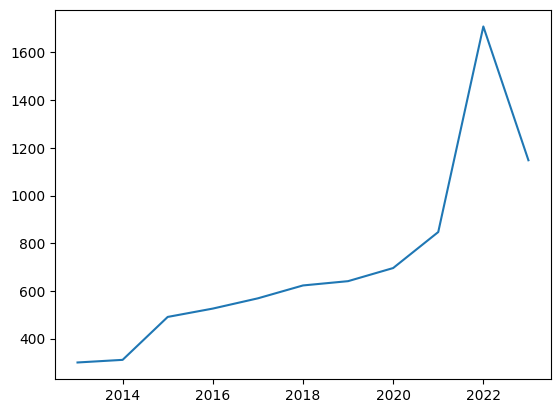

In [4]:
plt.plot(range(2013, 2024), counts_stations)

Вывод: 2023 необходимо рассматривать отдельно, т.к. значения сильно изменяются из года в год

## Анализ маршрутов

In [5]:
import networkx as nx

In [6]:
df = pd.read_table(f'data/src/2023/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')

In [7]:
stations = df[['startstation', 'endstation']]
stations.rename(columns={'startstation': 'source', 'endstation': 'target'})
graph = nx.Graph()
graph.add_edges_from(stations.to_numpy())

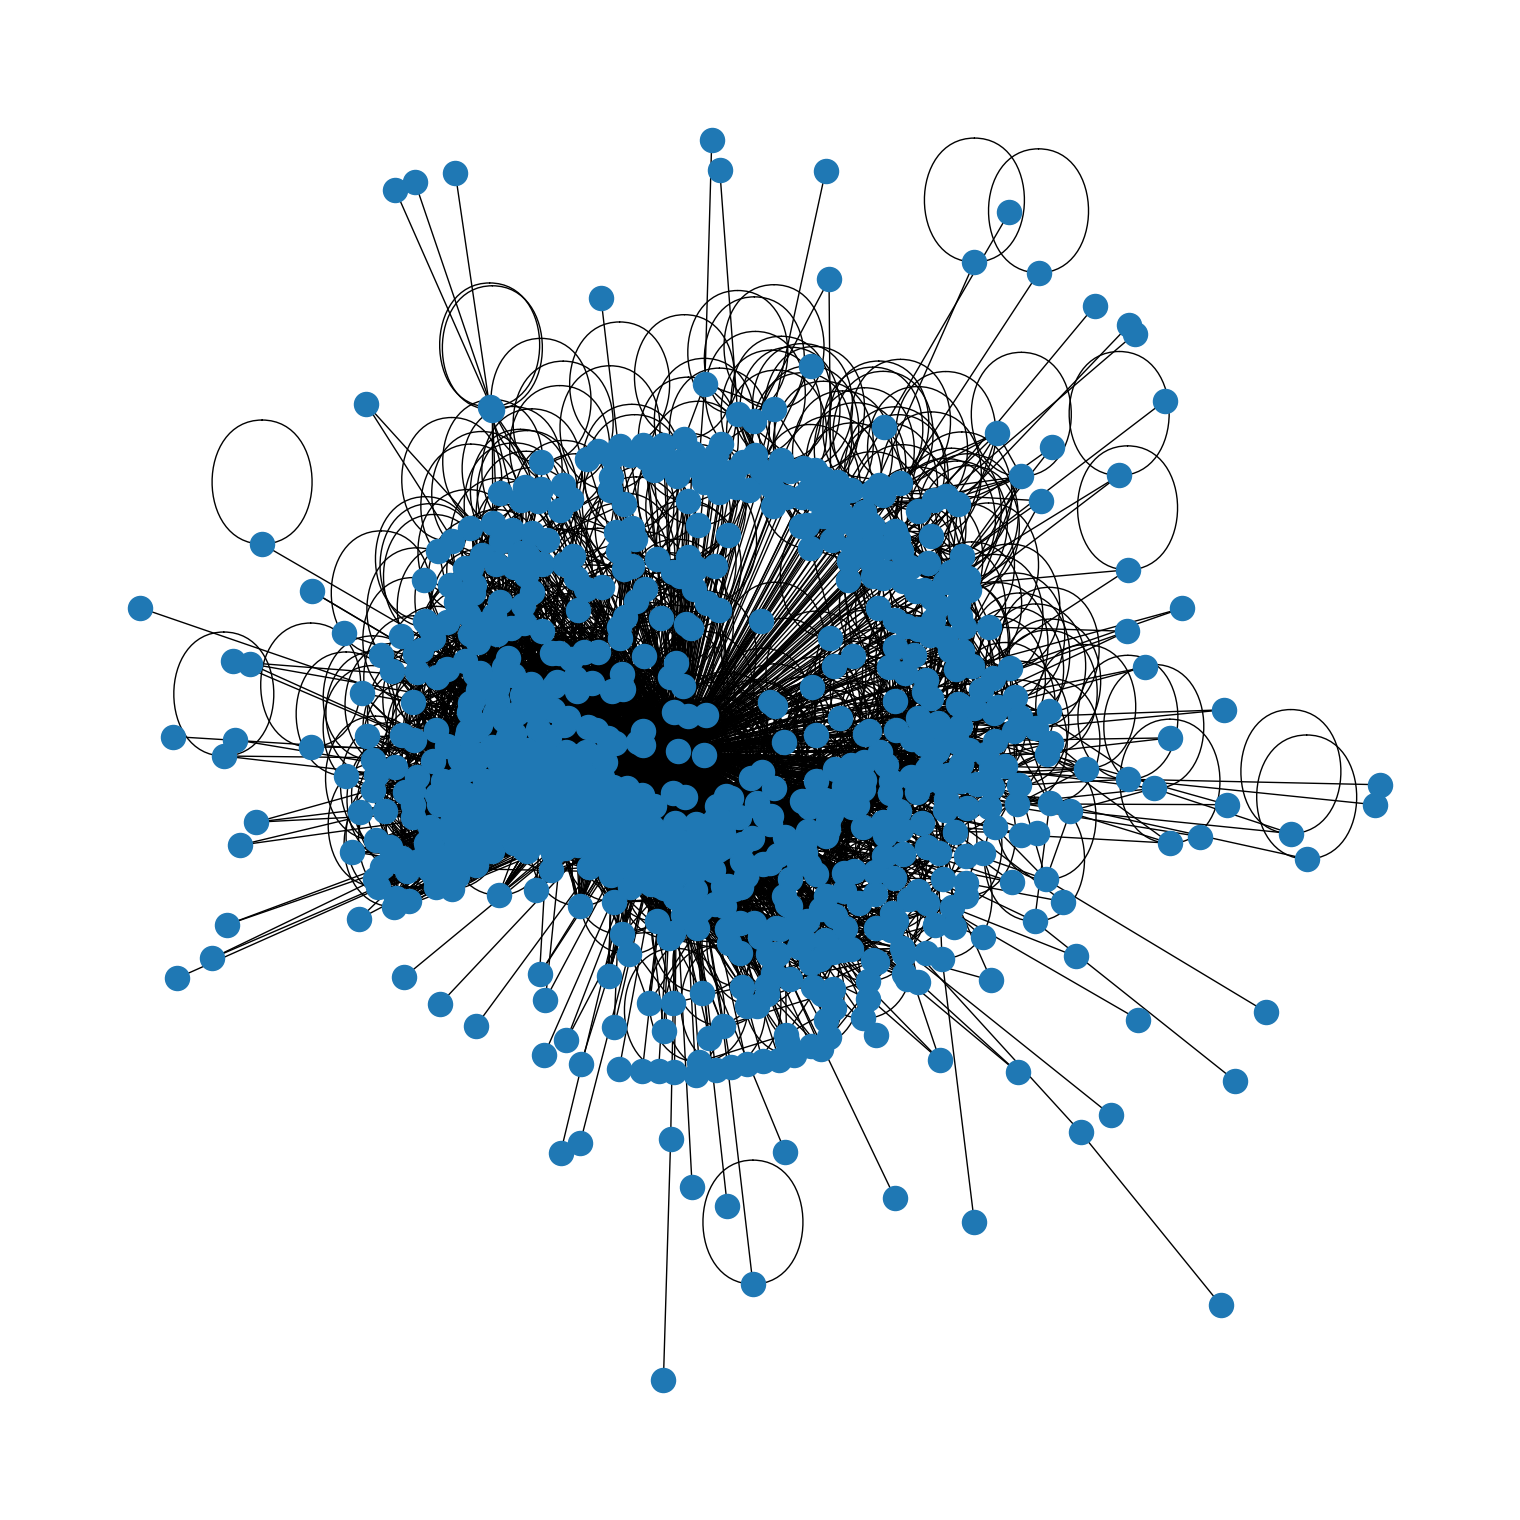

In [8]:
plt.figure(figsize=(15,15))
nx.draw(graph)

Вывод: существуют пункты, которые слабо связаны с остальными, поэтому они редко используются и, скорее всего, приносят малую прибыль; также имеют место быть круговые маршруты, быть может, они находятся в отдалении от других пунктов

## Анализ наиболее популярных типов байков на станции

In [9]:
stations = df[['id', 'startstation', 'biketype']].rename(columns={'startstation': 'station'}).groupby(by=['station']).agg({'id': 'count', 'biketype': pd.Series.mode}).reset_index()

In [10]:
stations.sort_values(by=['id'], ascending=False)[:10]

,station,id,biketype
1009,University Ave & 57th St,5908,classic_bike
265,Ellis Ave & 60th St,5744,classic_bike
179,Clinton St & Washington Blvd,5250,electric_bike
407,Kingsbury St & Kinzie St,4932,classic_bike
152,Clark St & Elm St,4423,classic_bike
106,Canal St & Adams St,4184,classic_bike
175,Clinton St & Madison St,4076,electric_bike
263,Ellis Ave & 55th St,3981,classic_bike
971,State St & Chicago Ave,3979,classic_bike
1042,Wells St & Concord Ln,3815,classic_bike


In [11]:
stations.sort_values(by=['id'])[:10]

,station,id,biketype
736,Public Rack - Laflin St &51st ST,1,electric_bike
670,Public Rack - Greenwood Ave & Lake Park Ave,1,electric_bike
735,Public Rack - Laflin St & 51st St,1,electric_bike
737,Public Rack - Lake Park Ave & 47th St,1,electric_bike
667,Public Rack - Forrestville Ave & 47th St,1,electric_bike
738,Public Rack - Langley Ave & 49th St,1,electric_bike
664,Public Rack - Ewing Ave & 96th St N,1,electric_bike
663,Public Rack - Ewing Ave & 95th St,1,electric_bike
834,Public Rack - Washington Park Ct & 51st St,1,electric_bike
662,Public Rack - Ewing Ave & 106th St,1,electric_bike


Вывод: наибольшей популярностью в самых популярных станциях пользуются классические байки, чем меньше популярность станции - тем чаще используются электробайки

## Поиск зависимости популярность пункта от его местоположения

In [12]:
stations = df[['id', 'startstation', 'startlat', 'startlng']].rename(columns={'startstation': 'station'}).groupby(by=['station']).agg({'id': 'count', 'startlat': 'max', 'startlng': 'max'}).reset_index()

In [13]:
stations['meanlat'], stations['meanlng'] = stations['startlat'].sum() / len(stations), stations['startlng'].sum() / len(stations)

In [14]:
stations['distance'] = ((stations['startlat'] - stations['meanlat']) ** 2 + (stations['startlng'] - stations['meanlng']) ** 2 ) ** 0.5

In [15]:
stations = stations.sort_values('distance')

In [16]:
stations

,station,id,startlat,startlng,meanlat,meanlng,distance
20,Ashland Ave & 13th St,541,41.865410,-87.666345,41.862837,-87.668025,0.003073
584,Paulina St & 18th St,483,41.858061,-87.668262,41.862837,-87.668025,0.004782
55,Blue Island Ave & 18th St,577,41.857585,-87.661279,41.862837,-87.668025,0.008549
1094,Wood St & Taylor St (Temp),967,41.869706,-87.673306,41.862837,-87.668025,0.008664
346,Hermitage Ave & Polk St,1044,41.871689,-87.669276,41.862837,-87.668025,0.008940
...,...,...,...,...,...,...,...
184,Commercial Ave & 130th St,20,41.659213,-87.550708,41.862837,-87.668025,0.235002
613,Public Rack - Avenue M & 132nd St,1,41.660000,-87.540000,41.862837,-87.668025,0.239861
617,Public Rack - Baltimore Ave & 133rd St,5,41.650000,-87.550000,41.862837,-87.668025,0.243371
345,Hegewisch Metra Station,18,41.648607,-87.546090,41.862837,-87.668025,0.246500


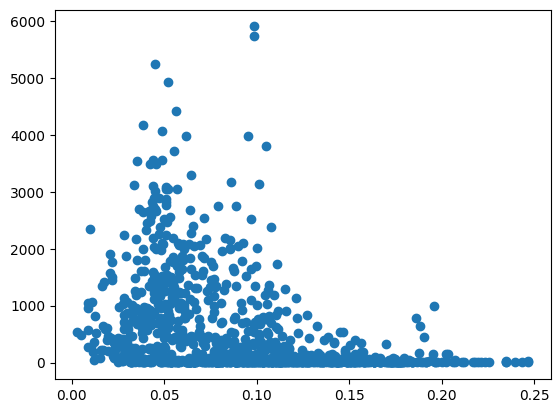

In [17]:
plt.scatter(stations['distance'], stations['id'])

Вывод: график смещен влево, из этого исходит, что при меньшем расстоянии от среднего значения будет больше вероятность того, что человек воспользуется станцией

## Слабые пункты на карте

In [18]:
temp = stations
stations = stations.loc[stations['id'] == 1]
stations = stations[['startlat', 'startlng', 'meanlat', 'meanlng']]
stations['lng-lat'] = stations['startlng'].astype(str) + ',' + stations['startlat'].astype(str)
stations = stations[['meanlat', 'meanlng', 'lng-lat']]

In [19]:
import requests


API_SERVER = "http://static-maps.yandex.ru/1.x"


def set_request(stations):
    params = {"ll": ",".join([str(round(stations['meanlng'].tolist()[0], 2)), str(round(stations['meanlat'].tolist()[0], 2))]),
              "spn": "0.4,0.4",
              "l": 'map'}
    params['pt'] = '~'.join(stations['lng-lat'].tolist())
    image = requests.get(API_SERVER, params)
    with open('data/map.png', "wb") as file:
        file.write(image.content)

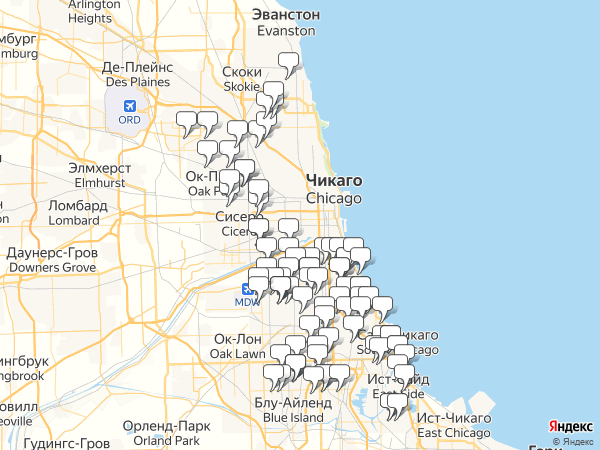

In [20]:
set_request(stations)
from IPython.display import Image
Image(filename='data/map.png')

Вывод: как и в прошлый раз, мы можем убедиться, что меньшим спросом пользуются пункты, отдаленные от центра города

# Сильные пункты на карте

In [21]:
import requests


API_SERVER = "http://static-maps.yandex.ru/1.x"


def set_request(stations):
    params = {"ll": ",".join([str(round(stations['meanlng'].tolist()[0], 2)), str(round(stations['meanlat'].tolist()[0], 2))]),
              "spn": "0.15,0.15",
              "l": 'map'}
    params['pt'] = '~'.join(stations['lng-lat'].tolist())
    image = requests.get(API_SERVER, params)
    with open('data/map.png', "wb") as file:
        file.write(image.content)

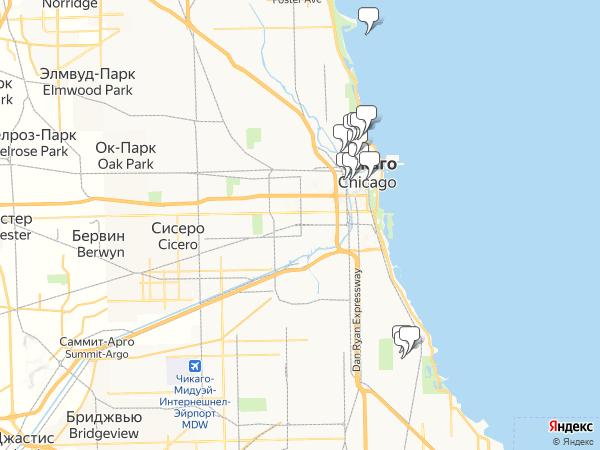

In [22]:
stations = temp
stations = stations.loc[stations['id'] >= 3500]
stations = stations[['startlat', 'startlng', 'meanlat', 'meanlng']]
stations['lng-lat'] = stations['startlng'].astype(str) + ',' + stations['startlat'].astype(str)
stations = stations[['meanlat', 'meanlng', 'lng-lat']]
set_request(stations)
from IPython.display import Image
Image(filename='data/map.png')

Вывод: в очередной раз подтверждаем прошлый результат, но добавим, что люди часто пользуются загородными парками

# Анализ количества необходимых байков

In [23]:
stations = df[['startstation', 'id', 'endstation']].dropna()
stations_start = stations[['startstation', 'id']].rename(columns={'id': 'count'}).groupby(by=['startstation']).count()
stations_end = stations[['endstation', 'id']].rename(columns={'id': 'count'}).groupby(by=['endstation']).count()
count = stations_start - stations_end
count = count.dropna()

In [25]:
count.sort_values('count')

,count
Green St & Randolph St*,-594.0
Sangamon St & Lake St,-406.0
St. Clair St & Erie St,-303.0
Clinton St & Madison St,-266.0
Clinton St & Washington Blvd,-237.0
...,...
Carpenter St & Huron St,343.0
Wells St & Huron St,369.0
Desplaines St & Kinzie St,388.0
Columbus Dr & Randolph St,406.0


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   2.,   0.,   2.,   3.,   7.,   5.,
          4.,  21.,  33.,  44.,  98., 556., 112.,  35.,  20.,  10.,  11.,
          7.,   2.,   4.,   3.,   3.,   2.,   1.,   1.,   0.,   3.,   2.,
          1.,   1.,   1.,   0.,   0.,   1.]),
 array([-594.  , -572.48, -550.96, -529.44, -507.92, -486.4 , -464.88,
        -443.36, -421.84, -400.32, -378.8 , -357.28, -335.76, -314.24,
        -292.72, -271.2 , -249.68, -228.16, -206.64, -185.12, -163.6 ,
        -142.08, -120.56,  -99.04,  -77.52,  -56.  ,  -34.48,  -12.96,
           8.56,   30.08,   51.6 ,   73.12,   94.64,  116.16,  137.68,
         159.2 ,  180.72,  202.24,  223.76,  245.28,  266.8 ,  288.32,
         309.84,  331.36,  352.88,  374.4 ,  395.92,  417.44,  438.96,
         460.48,  482.  ]),
 <BarContainer object of 50 artists>)

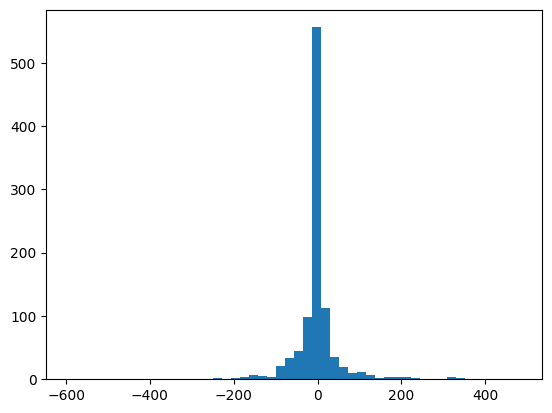

In [26]:
plt.hist(count['count'], bins=50)

Вывод: существует проблема, что байки в одних пунктах скорее уезжают, а в других - приезжают, из чего следует, что необходимо нанять специальных людей, которые будут заполнять станции за счет других